In [1]:
def get_obj_values(run_gen_text_content: str):
    output_list = []
    for solution_text in run_gen_text_content.split("--------------")[:-1]:
        run_gen_solution_text_content = solution_text
        output_list.append([float(item[item.find(': ')+2:]) for item in run_gen_solution_text_content[run_gen_solution_text_content.find(']')+1:].split('\n')[1:-1]])
    return output_list

In [2]:
import os

def load_runs_and_gens_as_dict(directory="."):
    data = {}
    run_index = 0

    while True:
        run_key = f"run_{run_index}"
        gen_index = 0
        run_data = []

        while True:
            filename = f"{run_key}_gen_{gen_index}.txt"
            filepath = os.path.join(directory, filename)

            if os.path.isfile(filepath):
                with open(filepath, 'r', encoding='utf-8') as f:
                    run_data.append(get_obj_values(f.read()))
                gen_index += 1
            else:
                break  # No more gens for this run

        if run_data:
            data[run_key] = run_data
            run_index += 1
        else:
            break  # No more runs

    return data


In [3]:
run_gen_dict = load_runs_and_gens_as_dict()
run_gen_dict

{'run_0': [[[0.48, 0.31, 0.38],
   [0.51, 0.32, 0.33],
   [0.52, 0.29, 0.34],
   [0.48, 0.34, 0.34],
   [0.44, 0.34, 0.39],
   [0.5, 0.33, 0.28],
   [0.65, 0.28, 0.44]],
  [[0.48, 0.31, 0.38],
   [0.52, 0.29, 0.34],
   [0.44, 0.34, 0.39],
   [0.5, 0.33, 0.28],
   [0.65, 0.28, 0.44],
   [0.49, 0.31, 0.32],
   [0.47, 0.32, 0.34],
   [0.51, 0.29, 0.42],
   [0.5, 0.32, 0.31],
   [0.64, 0.27, 0.53],
   [0.49, 0.3, 0.37]],
  [[0.52, 0.29, 0.34],
   [0.65, 0.28, 0.44],
   [0.49, 0.31, 0.32],
   [0.47, 0.32, 0.34],
   [0.51, 0.29, 0.42],
   [0.5, 0.32, 0.31],
   [0.49, 0.3, 0.37],
   [0.51, 0.28, 0.52],
   [0.63, 0.27, 0.45],
   [0.42, 0.33, 0.35],
   [0.5, 0.3, 0.34],
   [0.45, 0.33, 0.28],
   [0.48, 0.3, 0.38],
   [0.55, 0.29, 0.32],
   [0.46, 0.31, 0.57]],
  [[0.52, 0.29, 0.34],
   [0.49, 0.31, 0.32],
   [0.47, 0.32, 0.34],
   [0.5, 0.32, 0.31],
   [0.49, 0.3, 0.37],
   [0.51, 0.28, 0.52],
   [0.5, 0.3, 0.34],
   [0.48, 0.3, 0.38],
   [0.55, 0.29, 0.32],
   [0.51, 0.32, 0.3],
   [0.48, 0.31

In [4]:
def dict_to_data_for_visualization(run_gen_values_dict: dict):
    all = {}
    for key,run in run_gen_values_dict.items():
        all[key] = {}
        for generation in run:
            all[key][run.index(generation)] = {}
            min_obj1 = min([solution[0] for solution in generation])
            min_obj2 = min([solution[1] for solution in generation])
            min_obj3 = min([solution[2] for solution in generation])
            avg_obj1 = sum([solution[0] for solution in generation]) / len(generation)
            avg_obj2 = sum([solution[1] for solution in generation]) / len(generation)
            avg_obj3 = sum([solution[2] for solution in generation]) / len(generation)

            all[key][run.index(generation)]["min_obj1"] = min_obj1
            all[key][run.index(generation)]["min_obj2"] = min_obj2
            all[key][run.index(generation)]["min_obj3"] = min_obj3

            all[key][run.index(generation)]["avg_obj1"] = avg_obj1
            all[key][run.index(generation)]["avg_obj2"] = avg_obj2
            all[key][run.index(generation)]["avg_obj3"] = avg_obj3

            print(f"For the run index {key} and generation index {run.index(generation)}:")
            print(f"MIN of objective index 0: {min_obj1}")
            print(f"MIN of objective index 1: {min_obj2}")
            print(f"MIN of objective index 2: {min_obj3}")
            print(f"AVG of objective index 0: {avg_obj1}")
            print(f"AVG of objective index 1: {avg_obj2}")
            print(f"AVG of objective index 2: {avg_obj3}")
            print("--------------")
    return all


visualization_data = dict_to_data_for_visualization(run_gen_dict)
visualization_data

For the run index run_0 and generation index 0:
MIN of objective index 0: 0.44
MIN of objective index 1: 0.28
MIN of objective index 2: 0.28
AVG of objective index 0: 0.5114285714285715
AVG of objective index 1: 0.3157142857142857
AVG of objective index 2: 0.35714285714285715
--------------
For the run index run_0 and generation index 1:
MIN of objective index 0: 0.44
MIN of objective index 1: 0.27
MIN of objective index 2: 0.28
AVG of objective index 0: 0.5172727272727273
AVG of objective index 1: 0.3054545454545454
AVG of objective index 2: 0.37454545454545457
--------------
For the run index run_0 and generation index 2:
MIN of objective index 0: 0.42
MIN of objective index 1: 0.27
MIN of objective index 2: 0.28
AVG of objective index 0: 0.5086666666666667
AVG of objective index 1: 0.3013333333333333
AVG of objective index 2: 0.38333333333333336
--------------
For the run index run_0 and generation index 3:
MIN of objective index 0: 0.4
MIN of objective index 1: 0.25
MIN of objectiv

{'run_0': {0: {'min_obj1': 0.44,
   'min_obj2': 0.28,
   'min_obj3': 0.28,
   'avg_obj1': 0.5114285714285715,
   'avg_obj2': 0.3157142857142857,
   'avg_obj3': 0.35714285714285715},
  1: {'min_obj1': 0.44,
   'min_obj2': 0.27,
   'min_obj3': 0.28,
   'avg_obj1': 0.5172727272727273,
   'avg_obj2': 0.3054545454545454,
   'avg_obj3': 0.37454545454545457},
  2: {'min_obj1': 0.42,
   'min_obj2': 0.27,
   'min_obj3': 0.28,
   'avg_obj1': 0.5086666666666667,
   'avg_obj2': 0.3013333333333333,
   'avg_obj3': 0.38333333333333336},
  3: {'min_obj1': 0.4,
   'min_obj2': 0.25,
   'min_obj3': 0.28,
   'avg_obj1': 0.503,
   'avg_obj2': 0.2985,
   'avg_obj3': 0.36750000000000005},
  4: {'min_obj1': 0.36,
   'min_obj2': 0.24,
   'min_obj3': 0.27,
   'avg_obj1': 0.49266666666666664,
   'avg_obj2': 0.29333333333333333,
   'avg_obj3': 0.35933333333333334},
  5: {'min_obj1': 0.32,
   'min_obj2': 0.24,
   'min_obj3': 0.27,
   'avg_obj1': 0.4722222222222222,
   'avg_obj2': 0.29277777777777775,
   'avg_obj3'

{0: {'min_obj1': 0.44, 'min_obj2': 0.28, 'min_obj3': 0.28, 'avg_obj1': 0.5114285714285715, 'avg_obj2': 0.3157142857142857, 'avg_obj3': 0.35714285714285715}, 1: {'min_obj1': 0.44, 'min_obj2': 0.27, 'min_obj3': 0.28, 'avg_obj1': 0.5172727272727273, 'avg_obj2': 0.3054545454545454, 'avg_obj3': 0.37454545454545457}, 2: {'min_obj1': 0.42, 'min_obj2': 0.27, 'min_obj3': 0.28, 'avg_obj1': 0.5086666666666667, 'avg_obj2': 0.3013333333333333, 'avg_obj3': 0.38333333333333336}, 3: {'min_obj1': 0.4, 'min_obj2': 0.25, 'min_obj3': 0.28, 'avg_obj1': 0.503, 'avg_obj2': 0.2985, 'avg_obj3': 0.36750000000000005}, 4: {'min_obj1': 0.36, 'min_obj2': 0.24, 'min_obj3': 0.27, 'avg_obj1': 0.49266666666666664, 'avg_obj2': 0.29333333333333333, 'avg_obj3': 0.35933333333333334}, 5: {'min_obj1': 0.32, 'min_obj2': 0.24, 'min_obj3': 0.27, 'avg_obj1': 0.4722222222222222, 'avg_obj2': 0.29277777777777775, 'avg_obj3': 0.3561111111111111}, 6: {'min_obj1': 0.3, 'min_obj2': 0.24, 'min_obj3': 0.27, 'avg_obj1': 0.4482608695652174

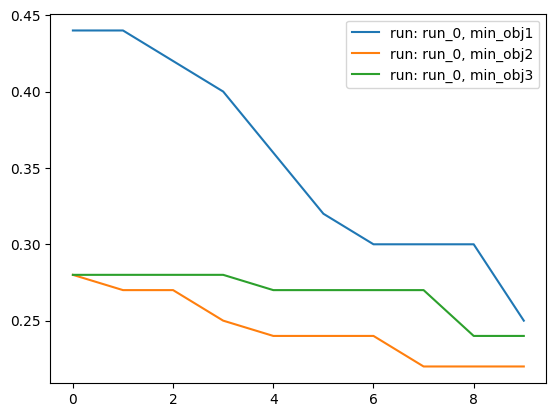

{0: {'min_obj1': 0.46, 'min_obj2': 0.18, 'min_obj3': 0.15, 'avg_obj1': 0.544, 'avg_obj2': 0.205, 'avg_obj3': 0.21400000000000002}, 1: {'min_obj1': 0.45, 'min_obj2': 0.17, 'min_obj3': 0.15, 'avg_obj1': 0.533125, 'avg_obj2': 0.201875, 'avg_obj3': 0.22187500000000002}, 2: {'min_obj1': 0.45, 'min_obj2': 0.17, 'min_obj3': 0.14, 'avg_obj1': 0.53, 'avg_obj2': 0.19571428571428573, 'avg_obj3': 0.2178571428571429}, 3: {'min_obj1': 0.37, 'min_obj2': 0.17, 'min_obj3': 0.14, 'avg_obj1': 0.506842105263158, 'avg_obj2': 0.19999999999999998, 'avg_obj3': 0.22210526315789472}, 4: {'min_obj1': 0.34, 'min_obj2': 0.15, 'min_obj3': 0.14, 'avg_obj1': 0.5016666666666667, 'avg_obj2': 0.19333333333333333, 'avg_obj3': 0.22416666666666665}, 5: {'min_obj1': 0.34, 'min_obj2': 0.15, 'min_obj3': 0.14, 'avg_obj1': 0.47419354838709676, 'avg_obj2': 0.19129032258064516, 'avg_obj3': 0.24580645161290324}, 6: {'min_obj1': 0.34, 'min_obj2': 0.15, 'min_obj3': 0.14, 'avg_obj1': 0.48533333333333334, 'avg_obj2': 0.187, 'avg_obj3'

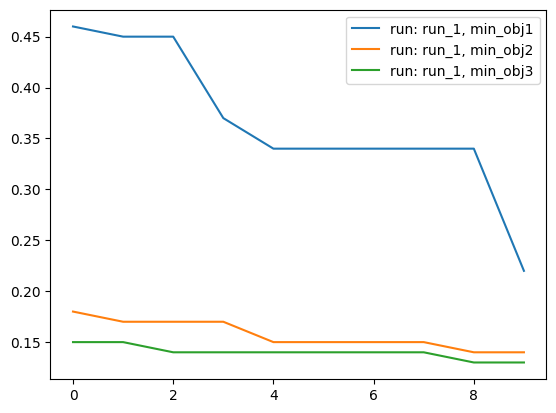

{0: {'min_obj1': 0.49, 'min_obj2': 0.15, 'min_obj3': 0.12, 'avg_obj1': 0.5583333333333333, 'avg_obj2': 0.15666666666666665, 'avg_obj3': 0.14166666666666666}, 1: {'min_obj1': 0.49, 'min_obj2': 0.13, 'min_obj3': 0.12, 'avg_obj1': 0.5820000000000001, 'avg_obj2': 0.151, 'avg_obj3': 0.155}, 2: {'min_obj1': 0.47, 'min_obj2': 0.13, 'min_obj3': 0.11, 'avg_obj1': 0.5533333333333333, 'avg_obj2': 0.155, 'avg_obj3': 0.15333333333333335}, 3: {'min_obj1': 0.42, 'min_obj2': 0.13, 'min_obj3': 0.11, 'avg_obj1': 0.5811764705882353, 'avg_obj2': 0.14705882352941177, 'avg_obj3': 0.15705882352941175}, 4: {'min_obj1': 0.42, 'min_obj2': 0.12, 'min_obj3': 0.11, 'avg_obj1': 0.5575, 'avg_obj2': 0.14583333333333334, 'avg_obj3': 0.15416666666666667}, 5: {'min_obj1': 0.42, 'min_obj2': 0.12, 'min_obj3': 0.11, 'avg_obj1': 0.5042857142857143, 'avg_obj2': 0.15357142857142855, 'avg_obj3': 0.14214285714285715}, 6: {'min_obj1': 0.42, 'min_obj2': 0.12, 'min_obj3': 0.11, 'avg_obj1': 0.5266666666666667, 'avg_obj2': 0.1493333

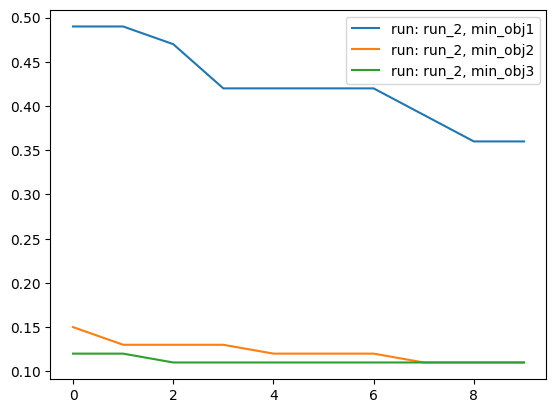

{0: {'min_obj1': 0.49, 'min_obj2': 0.12, 'min_obj3': 0.1, 'avg_obj1': 0.5633333333333334, 'avg_obj2': 0.13, 'avg_obj3': 0.12}, 1: {'min_obj1': 0.49, 'min_obj2': 0.11, 'min_obj3': 0.1, 'avg_obj1': 0.5633333333333334, 'avg_obj2': 0.1288888888888889, 'avg_obj3': 0.12000000000000001}, 2: {'min_obj1': 0.44, 'min_obj2': 0.11, 'min_obj3': 0.1, 'avg_obj1': 0.5661538461538462, 'avg_obj2': 0.12461538461538463, 'avg_obj3': 0.12384615384615386}, 3: {'min_obj1': 0.44, 'min_obj2': 0.1, 'min_obj3': 0.1, 'avg_obj1': 0.555, 'avg_obj2': 0.12214285714285714, 'avg_obj3': 0.12571428571428572}, 4: {'min_obj1': 0.42, 'min_obj2': 0.1, 'min_obj3': 0.1, 'avg_obj1': 0.5385, 'avg_obj2': 0.126, 'avg_obj3': 0.119}, 5: {'min_obj1': 0.38, 'min_obj2': 0.1, 'min_obj3': 0.1, 'avg_obj1': 0.5307142857142857, 'avg_obj2': 0.12142857142857143, 'avg_obj3': 0.12214285714285714}, 6: {'min_obj1': 0.28, 'min_obj2': 0.1, 'min_obj3': 0.1, 'avg_obj1': 0.49529411764705883, 'avg_obj2': 0.12411764705882353, 'avg_obj3': 0.12235294117647

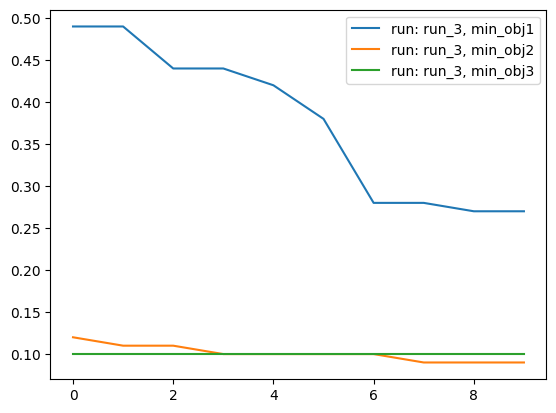

In [5]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        min_obj1_values = []
        min_obj2_values = []
        min_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            min_obj1 = gen_values["min_obj1"]
            min_obj2 = gen_values["min_obj2"]
            min_obj3 = gen_values["min_obj3"]

            min_obj1_values.append(min_obj1)
            min_obj2_values.append(min_obj2)
            min_obj3_values.append(min_obj3)

        plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)

{0: {'min_obj1': 0.44, 'min_obj2': 0.28, 'min_obj3': 0.28, 'avg_obj1': 0.5114285714285715, 'avg_obj2': 0.3157142857142857, 'avg_obj3': 0.35714285714285715}, 1: {'min_obj1': 0.44, 'min_obj2': 0.27, 'min_obj3': 0.28, 'avg_obj1': 0.5172727272727273, 'avg_obj2': 0.3054545454545454, 'avg_obj3': 0.37454545454545457}, 2: {'min_obj1': 0.42, 'min_obj2': 0.27, 'min_obj3': 0.28, 'avg_obj1': 0.5086666666666667, 'avg_obj2': 0.3013333333333333, 'avg_obj3': 0.38333333333333336}, 3: {'min_obj1': 0.4, 'min_obj2': 0.25, 'min_obj3': 0.28, 'avg_obj1': 0.503, 'avg_obj2': 0.2985, 'avg_obj3': 0.36750000000000005}, 4: {'min_obj1': 0.36, 'min_obj2': 0.24, 'min_obj3': 0.27, 'avg_obj1': 0.49266666666666664, 'avg_obj2': 0.29333333333333333, 'avg_obj3': 0.35933333333333334}, 5: {'min_obj1': 0.32, 'min_obj2': 0.24, 'min_obj3': 0.27, 'avg_obj1': 0.4722222222222222, 'avg_obj2': 0.29277777777777775, 'avg_obj3': 0.3561111111111111}, 6: {'min_obj1': 0.3, 'min_obj2': 0.24, 'min_obj3': 0.27, 'avg_obj1': 0.4482608695652174

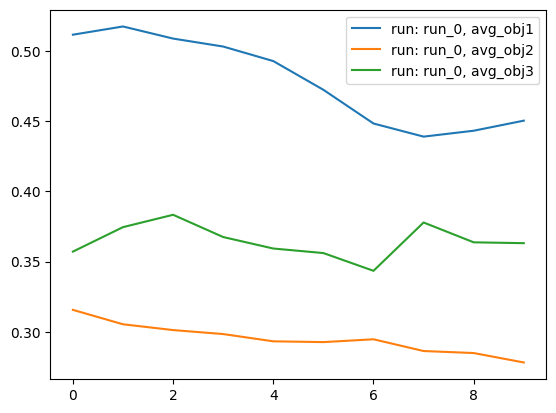

{0: {'min_obj1': 0.46, 'min_obj2': 0.18, 'min_obj3': 0.15, 'avg_obj1': 0.544, 'avg_obj2': 0.205, 'avg_obj3': 0.21400000000000002}, 1: {'min_obj1': 0.45, 'min_obj2': 0.17, 'min_obj3': 0.15, 'avg_obj1': 0.533125, 'avg_obj2': 0.201875, 'avg_obj3': 0.22187500000000002}, 2: {'min_obj1': 0.45, 'min_obj2': 0.17, 'min_obj3': 0.14, 'avg_obj1': 0.53, 'avg_obj2': 0.19571428571428573, 'avg_obj3': 0.2178571428571429}, 3: {'min_obj1': 0.37, 'min_obj2': 0.17, 'min_obj3': 0.14, 'avg_obj1': 0.506842105263158, 'avg_obj2': 0.19999999999999998, 'avg_obj3': 0.22210526315789472}, 4: {'min_obj1': 0.34, 'min_obj2': 0.15, 'min_obj3': 0.14, 'avg_obj1': 0.5016666666666667, 'avg_obj2': 0.19333333333333333, 'avg_obj3': 0.22416666666666665}, 5: {'min_obj1': 0.34, 'min_obj2': 0.15, 'min_obj3': 0.14, 'avg_obj1': 0.47419354838709676, 'avg_obj2': 0.19129032258064516, 'avg_obj3': 0.24580645161290324}, 6: {'min_obj1': 0.34, 'min_obj2': 0.15, 'min_obj3': 0.14, 'avg_obj1': 0.48533333333333334, 'avg_obj2': 0.187, 'avg_obj3'

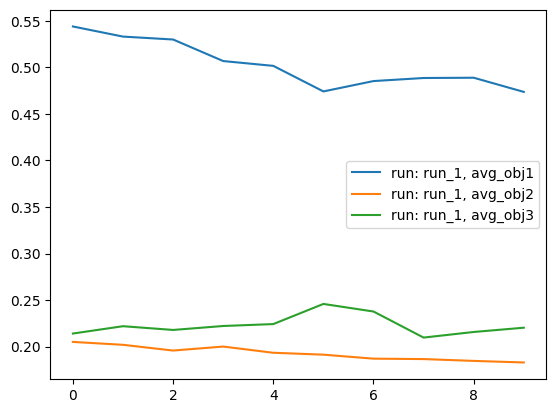

{0: {'min_obj1': 0.49, 'min_obj2': 0.15, 'min_obj3': 0.12, 'avg_obj1': 0.5583333333333333, 'avg_obj2': 0.15666666666666665, 'avg_obj3': 0.14166666666666666}, 1: {'min_obj1': 0.49, 'min_obj2': 0.13, 'min_obj3': 0.12, 'avg_obj1': 0.5820000000000001, 'avg_obj2': 0.151, 'avg_obj3': 0.155}, 2: {'min_obj1': 0.47, 'min_obj2': 0.13, 'min_obj3': 0.11, 'avg_obj1': 0.5533333333333333, 'avg_obj2': 0.155, 'avg_obj3': 0.15333333333333335}, 3: {'min_obj1': 0.42, 'min_obj2': 0.13, 'min_obj3': 0.11, 'avg_obj1': 0.5811764705882353, 'avg_obj2': 0.14705882352941177, 'avg_obj3': 0.15705882352941175}, 4: {'min_obj1': 0.42, 'min_obj2': 0.12, 'min_obj3': 0.11, 'avg_obj1': 0.5575, 'avg_obj2': 0.14583333333333334, 'avg_obj3': 0.15416666666666667}, 5: {'min_obj1': 0.42, 'min_obj2': 0.12, 'min_obj3': 0.11, 'avg_obj1': 0.5042857142857143, 'avg_obj2': 0.15357142857142855, 'avg_obj3': 0.14214285714285715}, 6: {'min_obj1': 0.42, 'min_obj2': 0.12, 'min_obj3': 0.11, 'avg_obj1': 0.5266666666666667, 'avg_obj2': 0.1493333

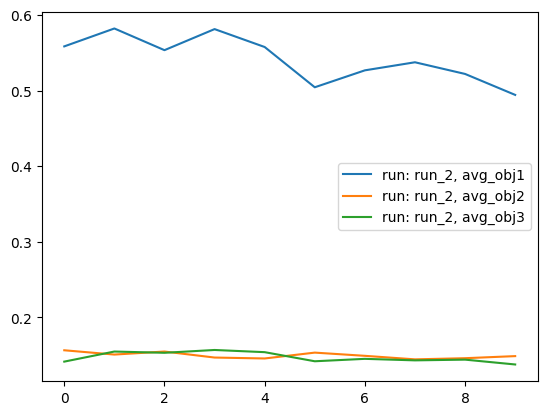

{0: {'min_obj1': 0.49, 'min_obj2': 0.12, 'min_obj3': 0.1, 'avg_obj1': 0.5633333333333334, 'avg_obj2': 0.13, 'avg_obj3': 0.12}, 1: {'min_obj1': 0.49, 'min_obj2': 0.11, 'min_obj3': 0.1, 'avg_obj1': 0.5633333333333334, 'avg_obj2': 0.1288888888888889, 'avg_obj3': 0.12000000000000001}, 2: {'min_obj1': 0.44, 'min_obj2': 0.11, 'min_obj3': 0.1, 'avg_obj1': 0.5661538461538462, 'avg_obj2': 0.12461538461538463, 'avg_obj3': 0.12384615384615386}, 3: {'min_obj1': 0.44, 'min_obj2': 0.1, 'min_obj3': 0.1, 'avg_obj1': 0.555, 'avg_obj2': 0.12214285714285714, 'avg_obj3': 0.12571428571428572}, 4: {'min_obj1': 0.42, 'min_obj2': 0.1, 'min_obj3': 0.1, 'avg_obj1': 0.5385, 'avg_obj2': 0.126, 'avg_obj3': 0.119}, 5: {'min_obj1': 0.38, 'min_obj2': 0.1, 'min_obj3': 0.1, 'avg_obj1': 0.5307142857142857, 'avg_obj2': 0.12142857142857143, 'avg_obj3': 0.12214285714285714}, 6: {'min_obj1': 0.28, 'min_obj2': 0.1, 'min_obj3': 0.1, 'avg_obj1': 0.49529411764705883, 'avg_obj2': 0.12411764705882353, 'avg_obj3': 0.12235294117647

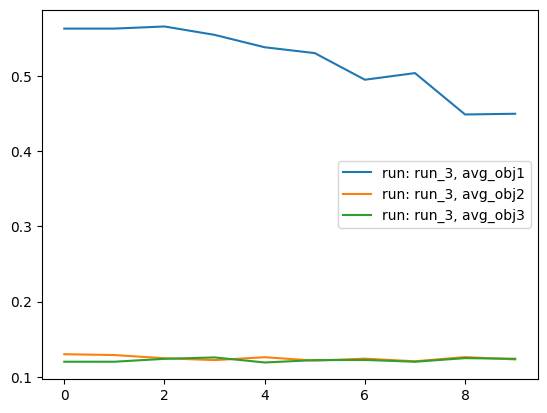

In [6]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        avg_obj1_values = []
        avg_obj2_values = []
        avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            avg_obj1 = gen_values["avg_obj1"]
            avg_obj2 = gen_values["avg_obj2"]
            avg_obj3 = gen_values["avg_obj3"]

            avg_obj1_values.append(avg_obj1)
            avg_obj2_values.append(avg_obj2)
            avg_obj3_values.append(avg_obj3)

        plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)